### Масштабирование данных [Домашнее задание]

**Примечание:**

> Вы не можете использовать библиотеку **```sklearn```** в этом домашнем задании.

> Пожалуйста, не удаляйте комментарии или строки кода.

1. Пожалуйста, реализуйте функцию ```load_data(filename=None)```, которая будет загружать данные файла csv из ```filename``` и возвращать ```DataFrame```.

In [41]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

def load_data(filename=None):
    #Начало вашего кода
    return pd.read_csv(filename)

    #Конец вашего кода

num_data = load_data(filename="num_house_prices.csv")
num_data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1334,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1335,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1336,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


### Ожидаемые результаты:

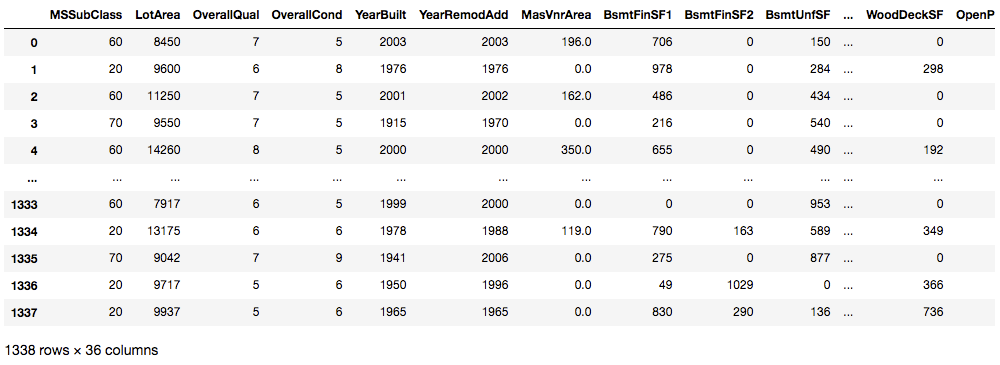

2. Пожалуйста, реализуйте функцию ```split_data(data, ratio=0.1)```, которая разбивает набор данных, загруженный в предыдущем вопросе, на наборы данных ```train``` и ```validation``` в соотношении 9:1.

In [54]:
import numpy as np

def split_data(data, ratio=0.1):
    np.random.seed(1)
    #Начало вашего кода    
    indeces = np.arange(0,len(data))
    np.random.shuffle(indeces)
    val_ind = indeces[: round(ratio * len(indeces))]
    train_ind = indeces[round(ratio * len(indeces)):]
    val_data = data.loc[val_ind].drop('Id', axis = 1)
    train_data = data.loc[train_ind].drop('Id', axis = 1)
    #Конец вашего кода
    return {"validation":val_data, "train":train_data}

splitted_data = split_data(num_data, ratio=0.1)

In [55]:
splitted_data["validation"] = splitted_data["validation"]
splitted_data["validation"].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
559,20,7943,4,5,1961,1961,192.0,903,0,126,...,64,0,39,0,0,0,0,4,2007,118500
1087,60,8935,7,5,2002,2002,95.0,0,0,831,...,144,68,0,0,0,0,0,7,2009,195000
1020,20,12085,8,5,2007,2007,328.0,1004,0,730,...,0,0,0,0,0,0,0,11,2007,318000
460,60,9803,7,5,2005,2005,0.0,400,0,466,...,0,108,0,0,0,0,0,2,2008,226700
802,20,8892,5,7,1953,1996,0.0,0,0,105,...,196,0,150,0,0,0,0,10,2008,116000


### Ожидаемые результаты:

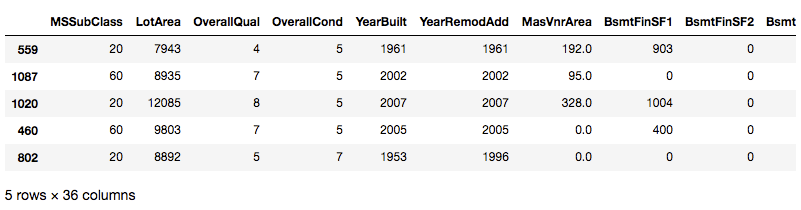

3. Пожалуйста, визуализируйте коэффициенты корреляции для набора данных ```train```.

Примечание: ```figsize=(10,8)```

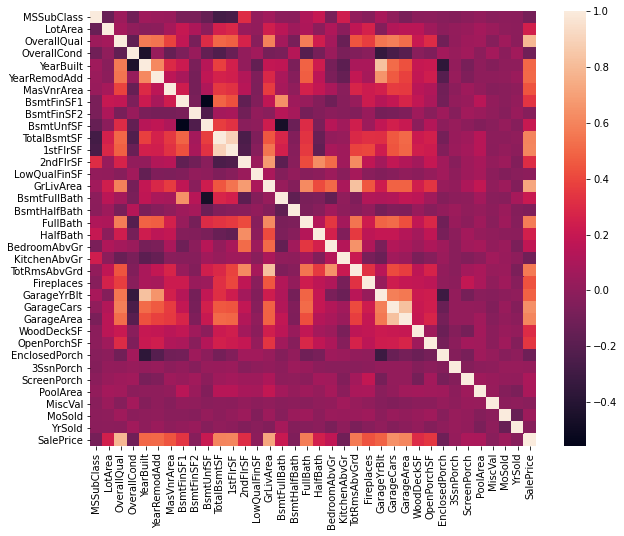

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

#Начало вашего кода 
plt.figure(figsize=(10,8))
sns.heatmap(splitted_data["train"].corr());
#Конец вашего кода

### Ожидаемые результаты:

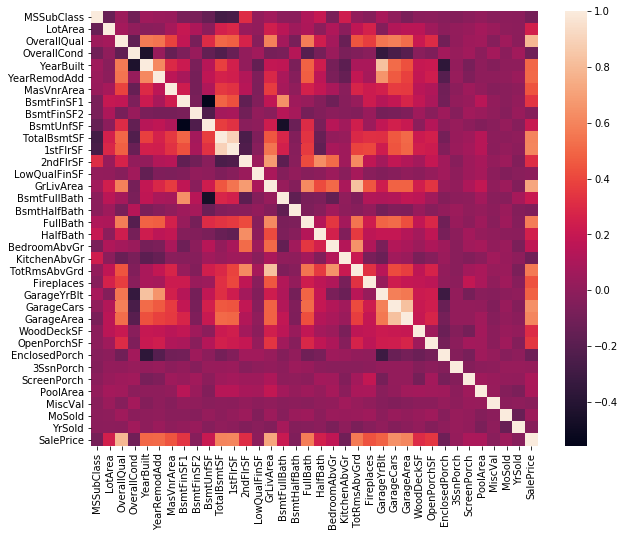

4. Теперь выберите топ 9 наиболее коррелированных параметров с ```"SalePrice"``` и назначьте результаты списку ```important```. Теперь визуализируйте коэффициенты корреляции этих параметров (переменных).

    Примечание: ```figsize=(8,8)```

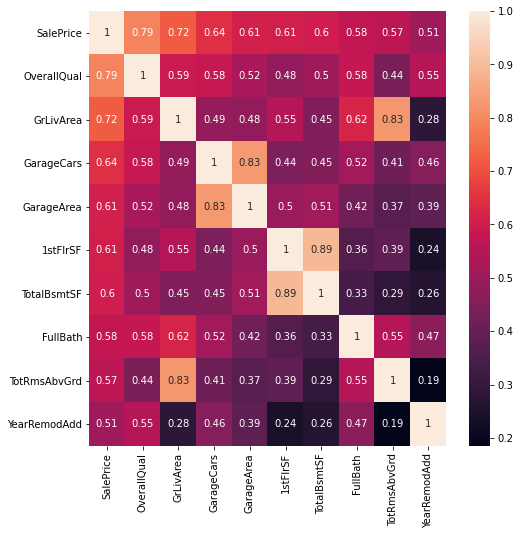

In [57]:
#Начало вашего кода 
plt.figure(figsize=(8,8))
most_corr = splitted_data["train"].corr()['SalePrice'].sort_values(ascending = False)[0:10].index
important = most_corr[1:]
sns.heatmap(splitted_data["train"][most_corr].corr(), annot = True);
#Конец вашего кода

### Ожидаемые результаты:


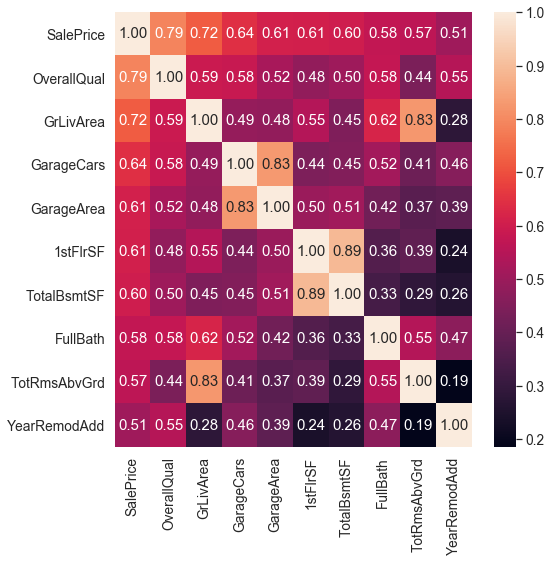

5. Пожалуйста, реализуйте функцию ```standard_scaling_fit(data)```, которая **стандартизирует** данные, и вернет кортеж из стандартизированных данных, среднего значения, стандартного отклонения.

In [58]:

def standard_scaling_fit(data):
    #Начало вашего кода    
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    sc.fit(data.values.reshape(-1,1))
    scaled_data = sc.transform(data.values.reshape(-1,1))
    m = data.mean()
    s = np.std(data)
    return (scaled_data, m, s)
    #Конец вашего кода
    
MSSubClass, mean_MSSubClass, std_MSSubClass = standard_scaling_fit(splitted_data["train"]["MSSubClass"])

In [59]:
print(MSSubClass[:5])
print(mean_MSSubClass)
print(std_MSSubClass) # не знаю почему но выдает разные std. поэтому в дальнейшем ответы чуть-чуть не будут сходиться

[[ 0.09312544]
 [-0.8703378 ]
 [-0.62947199]
 [-0.8703378 ]
 [-0.8703378 ]]
56.133720930232556
41.516892760580866


### Ожидаемые результаты:

```python
[ 0.09312544 -0.8703378  -0.62947199 -0.8703378  -0.8703378 ]
56.133720930232556
41.51689276058058
```

6. Теперь стандартизируйте все столбцы в наборе обучающих данных ```splitted_data["train"]``` и сохраните среднее значения и стандартное отклонения для каждого столбца.

In [48]:
splitted_data["train"].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
355,60,12474,10,5,2007,2008,272.0,1280,0,402,...,196,134,0,0,0,0,0,8,2008,426000
1316,20,8400,6,9,1962,2005,237.0,0,0,1319,...,0,36,0,0,0,0,0,7,2008,174000
133,30,6120,5,7,1931,1993,0.0,209,0,506,...,48,0,0,0,0,0,0,11,2009,105000
181,20,10125,6,6,1977,1977,0.0,641,279,276,...,238,83,0,0,0,0,0,2,2008,171500
1133,20,9037,8,5,2006,2006,32.0,428,0,1048,...,120,33,0,0,0,0,0,12,2007,265900


In [49]:
mean_vals = {}
std_vals = {}
#Начало вашего кода
for i in splitted_data["train"].columns:
    data, m , s = standard_scaling_fit(splitted_data["train"][i])
    mean_vals[i] = m
    std_vals[i] = s
    splitted_data["train"][i] = data
#Конец вашего кода
print(mean_vals)
print(std_vals)
splitted_data["train"].head()

{'MSSubClass': 56.133720930232556, 'LotArea': 10726.503322259136, 'OverallQual': 6.229235880398671, 'OverallCond': 5.598837209302325, 'YearBuilt': 1973.421096345515, 'YearRemodAdd': 1985.9800664451827, 'MasVnrArea': 111.8297342192691, 'BsmtFinSF1': 468.94435215946845, 'BsmtFinSF2': 50.521594684385384, 'BsmtUnfSF': 578.1328903654485, 'TotalBsmtSF': 1097.5988372093022, '1stFlrSF': 1176.5548172757476, '2ndFlrSF': 355.6619601328904, 'LowQualFinSF': 3.9966777408637872, 'GrLivArea': 1536.2134551495017, 'BsmtFullBath': 0.4418604651162791, 'BsmtHalfBath': 0.059800664451827246, 'FullBath': 1.573920265780731, 'HalfBath': 0.40282392026578073, 'BedroomAbvGr': 2.854651162790698, 'KitchenAbvGr': 1.0290697674418605, 'TotRmsAbvGrd': 6.545681063122924, 'Fireplaces': 0.6561461794019934, 'GarageYrBlt': 1978.8222591362126, 'GarageCars': 1.8729235880398671, 'GarageArea': 503.6237541528239, 'WoodDeckSF': 101.33471760797342, 'OpenPorchSF': 48.01578073089701, 'EnclosedPorch': 20.73421926910299, '3SsnPorch': 3

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
355,0.093125,0.164198,2.851966,-0.556685,1.140934,1.088726,0.862208,1.775286,-0.298079,-0.397577,...,0.732209,1.349231,-0.341911,-0.118511,-0.2892,-0.075681,-0.08511,0.607747,0.140602,3.066484
1316,-0.870338,-0.218603,-0.173379,3.161753,-0.388063,0.940397,0.673801,-1.026453,-0.298079,1.672328,...,-0.783795,-0.188547,-0.341911,-0.118511,-0.2892,-0.075681,-0.08511,0.235934,0.140602,-0.173669
133,-0.629472,-0.432836,-0.929716,1.302534,-1.441372,0.347085,-0.601988,-0.568981,-0.298079,-0.162823,...,-0.412529,-0.753445,-0.341911,-0.118511,-0.2892,-0.075681,-0.08511,1.723184,0.892977,-1.060854
181,-0.870338,-0.056518,-0.173379,0.372925,0.121603,-0.443999,-0.601988,0.376605,1.348028,-0.681992,...,1.057067,0.548959,-0.341911,-0.118511,-0.2892,-0.075681,-0.08511,-1.623129,0.140602,-0.205813
1133,-0.870338,-0.158749,1.339293,-0.556685,1.106957,0.989840,-0.429729,-0.089621,-0.298079,1.060611,...,0.144371,-0.235622,-0.341911,-0.118511,-0.2892,-0.075681,-0.08511,2.094997,-0.611773,1.007958


### Ожидаемые результаты:

```python
{'MSSubClass': 56.133720930232556, 'LotArea': 10726.503322259136, 'OverallQual': 6.229235880398671, 'OverallCond': 5.598837209302325, 'YearBuilt': 1973.421096345515, 'YearRemodAdd': 1985.9800664451827, 'MasVnrArea': 111.8297342192691, 'BsmtFinSF1': 468.94435215946845, 'BsmtFinSF2': 50.521594684385384, 'BsmtUnfSF': 578.1328903654485, 'TotalBsmtSF': 1097.5988372093022, '1stFlrSF': 1176.5548172757476, '2ndFlrSF': 355.6619601328904, 'LowQualFinSF': 3.9966777408637872, 'GrLivArea': 1536.2134551495017, 'BsmtFullBath': 0.4418604651162791, 'BsmtHalfBath': 0.059800664451827246, 'FullBath': 1.573920265780731, 'HalfBath': 0.40282392026578073, 'BedroomAbvGr': 2.854651162790698, 'KitchenAbvGr': 1.0290697674418605, 'TotRmsAbvGrd': 6.545681063122924, 'Fireplaces': 0.6561461794019934, 'GarageYrBlt': 1978.8222591362126, 'GarageCars': 1.8729235880398671, 'GarageArea': 503.6237541528239, 'WoodDeckSF': 101.33471760797342, 'OpenPorchSF': 48.01578073089701, 'EnclosedPorch': 20.73421926910299, '3SsnPorch': 3.5697674418604652, 'ScreenPorch': 16.89202657807309, 'PoolArea': 3.345514950166113, 'MiscVal': 45.48504983388705, 'MoSold': 6.365448504983389, 'YrSold': 2007.813122923588, 'SalePrice': 187506.9584717608}
{'MSSubClass': 41.51689276058058, 'LotArea': 10642.617729691996, 'OverallQual': 1.3221631378030052, 'OverallCond': 1.075720562066196, 'YearBuilt': 29.43106005240031, 'YearRemodAdd': 20.225422343320414, 'MasVnrArea': 185.76752452738435, 'BsmtFinSF1': 456.8591014718542, 'BsmtFinSF2': 169.49084991457786, 'BsmtUnfSF': 443.01546804994615, 'TotalBsmtSF': 402.27502042563935, '1stFlrSF': 383.57702187784173, '2ndFlrSF': 438.81073177442954, 'LowQualFinSF': 40.007702608777244, 'GrLivArea': 513.1202284930174, 'BsmtFullBath': 0.5162880487681081, 'BsmtHalfBath': 0.23711715455223228, 'FullBath': 0.5425584589241012, 'HalfBath': 0.5021799642600577, 'BedroomAbvGr': 0.7633441645342868, 'KitchenAbvGr': 0.1728752313978001, 'TotRmsAbvGrd': 1.5664907618358757, 'Fireplaces': 0.6429043566924817, 'GarageYrBlt': 24.61062156670623, 'GarageCars': 0.6350486607104864, 'GarageArea': 188.5549845355866, 'WoodDeckSF': 129.28729407527115, 'OpenPorchSF': 63.72833942591902, 'EnclosedPorch': 60.6421680843607, '3SsnPorch': 30.121806147602722, 'ScreenPorch': 58.40948333732727, 'PoolArea': 44.20559661675353, 'MiscVal': 534.4237066986043, 'MoSold': 2.6895272864867725, 'YrSold': 1.3291245144541628, 'SalePrice': 77774.09460974383}
```

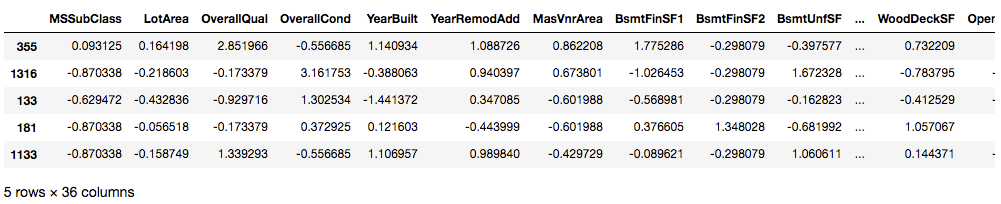

7. Пожалуйста, реализуйте функцию ```scale_validation(data, mean_val, std_val)```, которая будет стандартизировать данные на основе входных аргументов ```mean_val``` и ```std_val```.

In [50]:
def scale_validation(data, mean_val, std_val):
    #Начало вашего кода 
    return (data.values - mean_val)/ std_val
    #Конец вашего кода
    
MSSubClass_val = scale_validation(splitted_data["validation"]["MSSubClass"], mean_vals["MSSubClass"], std_vals["MSSubClass"])
print(MSSubClass_val[:5])

[-0.86997628  0.09308676 -0.86997628  0.09308676 -0.86997628]


### Ожидаемые результаты:

```python
[-0.8703378   0.09312544 -0.8703378   0.09312544 -0.8703378 ]
```

8. Пожалуйста, стандартизируйте все столбцы в проверочном наборе данных ```splitted_data["validation"]```, используя средние значения и стандартные отклонения, полученные из обучающего набора данных ```splitted_data["train"]```.

In [51]:
#Начало вашего кода
for i in splitted_data["validation"].columns:
    splitted_data["validation"][i] = scale_validation(splitted_data["validation"][i], mean_vals[i], std_vals[i])
#Конец вашего кода
splitted_data["validation"].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
559,-0.869976,-0.261434,-1.685352,-0.556453,-0.421865,-1.234570,0.431383,0.949692,-0.297955,-1.020156,...,-0.288653,-0.753132,0.301081,-0.118462,-0.28908,-0.075649,-0.085075,-0.879138,-0.611519,-0.886906
1087,0.093087,-0.168263,0.582715,-0.556453,0.970642,0.791740,-0.090558,-1.026027,-0.297955,0.570549,...,0.329867,0.313454,-0.341769,-0.118462,-0.28908,-0.075649,-0.085075,0.235836,0.892606,0.096304
1020,-0.869976,0.127594,1.338737,-0.556453,1.140460,1.038851,1.163177,1.170675,-0.297955,0.342661,...,-0.783469,-0.753132,-0.341769,-0.118462,-0.28908,-0.075649,-0.085075,1.722469,-0.611519,1.677150
460,0.093087,-0.086738,0.582715,-0.556453,1.072533,0.940007,-0.601737,-0.150847,-0.297955,-0.253008,...,-0.783469,0.940858,-0.341769,-0.118462,-0.28908,-0.075649,-0.085075,-1.622454,0.140543,0.503725
802,-0.869976,-0.172302,-0.929330,1.301993,-0.693574,0.495207,-0.601737,-1.026027,-0.297955,-1.067539,...,0.731905,-0.753132,2.130730,-0.118462,-0.28908,-0.075649,-0.085075,1.350811,0.140543,-0.919037


### Ожидаемые результаты:

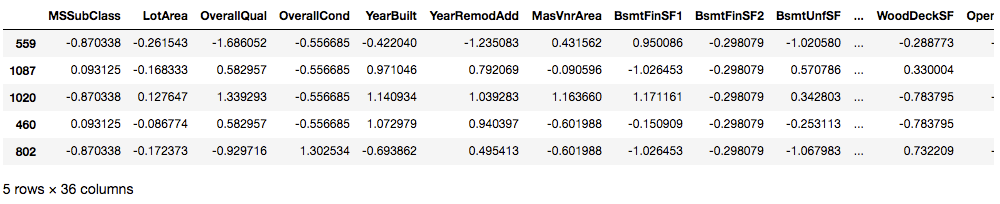

### Отличная работа